In [1]:
import numpy as np

In [5]:
a*a

array([ 1,  4,  9, 16, 25])

In [2]:
a = np.array([1,2,3,4,5])

In [6]:
import torch

In [7]:
b = torch.tensor([1,2,34,5])

In [9]:
b.device

device(type='cpu')

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def gamma_correction(RGBimage, correct_param = 0.35,equalizeHist = False):
    red = RGBimage[:,:,2]
    green = RGBimage[:,:,1]
    blue = RGBimage[:,:,0]
    
    red = red/255.0
    red = cv2.pow(red, correct_param)
    red = np.uint8(red*255)
    if equalizeHist:
        red = cv2.equalizeHist(red)
    
    green = green/255.0
    green = cv2.pow(green, correct_param)
    green = np.uint8(green*255)
    if equalizeHist:
        green = cv2.equalizeHist(green)
        
    
    blue = blue/255.0
    blue = cv2.pow(blue, correct_param)
    blue = np.uint8(blue*255)
    if equalizeHist:
        blue = cv2.equalizeHist(blue)
    

    output = cv2.merge((blue,green,red))
    return output
def gamma_correction_auto(RGBimage,equalizeHist = False,vidsize=None): #0.35
    if not vidsize:
        vidsize = RGBimage.shape
    originalFile = RGBimage.copy()
    red = RGBimage[:,:,2]
    green = RGBimage[:,:,1]
    blue = RGBimage[:,:,0]
    
    forLuminance = cv2.cvtColor(originalFile,cv2.COLOR_BGR2YUV)
    Y = forLuminance[:,:,0]
    totalPix = vidsize[0]* vidsize[1]
    summ = np.sum(Y[:,:])
    Yaverage = np.divide(totalPix,summ)
    #Yclipped = np.clip(Yaverage,0,1)
    epsilon = 1.19209e-007
    correct_param = np.divide(-0.3,np.log10([Yaverage + epsilon]))
    correct_param = float(0.7 - correct_param )

    red = red/255.0
    red = cv2.pow(red, correct_param)
    red = np.uint8(red*255)
    if equalizeHist:
        red = cv2.equalizeHist(red)
    
    green = green/255.0
    green = cv2.pow(green, correct_param)
    green = np.uint8(green*255)
    if equalizeHist:
        green = cv2.equalizeHist(green)
        
    
    blue = blue/255.0
    blue = cv2.pow(blue, correct_param)
    blue = np.uint8(blue*255)
    if equalizeHist:
        blue = cv2.equalizeHist(blue)
    

    output = cv2.merge((blue,green,red))
    #print(correct_param)
    return output

In [20]:
def hist(img):
    (b, g, r) = cv2.split(img)
    bH = cv2.equalizeHist(b)
    gH = cv2.equalizeHist(g)
    rH = cv2.equalizeHist(r)
    # 合并每一个通道
    return cv2.merge((bH, gH, rH))

In [28]:
def hist_clahe(img):
    hist = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
    (b, g, r) = cv2.split(img)
    bH = hist.apply(b)
    gH = hist.apply(g)
    rH = hist.apply(r)
    return cv2.merge((bH, gH, rH))

Text(0.5, 1.0, 'clahe')

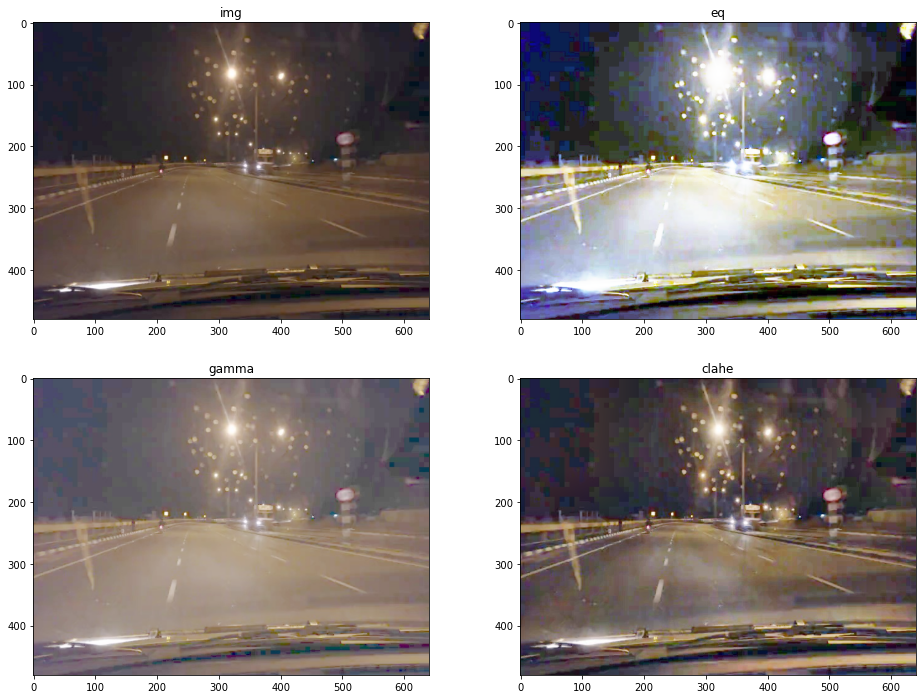

In [33]:
img = cv2.imread("data/lane_night.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(16,12))
img_eq = hist(img)
gamma = gamma_correction_auto(img,equalizeHist = False) #0.2
clahe = hist_clahe(img) #0.2


plt.subplot(221)
plt.imshow(img)
plt.title("img")

plt.subplot(222)
plt.imshow(img_eq)
plt.title("eq")


plt.subplot(223)
plt.imshow(gamma)
plt.title("gamma")

plt.subplot(224)
plt.imshow(clahe)
plt.title("clahe")


In [32]:
not img

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()